In [5]:
#Q21 Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy?
# Import required libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data      # Features
y = iris.target    # Target labels

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and train the SVM Classifier
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("SVM Classifier Accuracy: {:.2f}%".format(accuracy * 100))


SVM Classifier Accuracy: 100.00%


In [6]:
#Q22 Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies?
# Q22: Train SVM classifiers with Linear and RBF kernels on the Wine dataset
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Load Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# 2. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Feature scaling (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Train SVM with Linear kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

# 5. Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

# 6. Predictions
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# 7. Accuracy comparison
acc_linear = accuracy_score(y_test, y_pred_linear)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

print("SVM (Linear kernel) Accuracy:", acc_linear)
print("SVM (RBF kernel) Accuracy:", acc_rbf)


SVM (Linear kernel) Accuracy: 0.9629629629629629
SVM (RBF kernel) Accuracy: 0.9814814814814815


In [8]:
#Q23 Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE)?
# Q23: Train an SVM Regressor on a housing dataset and evaluate using MSE

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# 1. Load dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# 2. Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Feature scaling (important for SVM performance)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Reshape y to 2D for scaling
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

# 4. Create and train the SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train_scaled, y_train_scaled)

# 5. Predict
y_pred_scaled = svr.predict(X_test_scaled)

# Inverse transform predictions to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# 6. Evaluate using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.32654986710621986


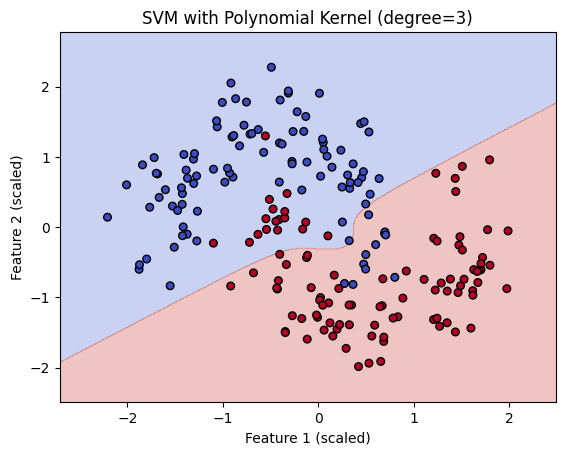

In [9]:
#Q24 Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary?
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Step 1: Generate sample data
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Step 2: Feature scaling (important for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Create and train the SVM model with polynomial kernel
svm_poly = SVC(kernel='poly', degree=3, C=1.0, gamma='scale')
svm_poly.fit(X_scaled, y)

# Step 4: Create a meshgrid for decision boundary plotting
x_min, x_max = X_scaled[:, 0].min() - 0.5, X_scaled[:, 0].max() + 0.5
y_min, y_max = X_scaled[:, 1].min() - 0.5, X_scaled[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Step 5: Predict on the grid
Z = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 6: Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, s=30, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("SVM with Polynomial Kernel (degree=3)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()


In [10]:
#Q25 Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy?
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 2: Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Create and train Gaussian Naïve Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Step 4: Predict on the test set
y_pred = gnb.predict(X_test)

# Step 5: Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Optional: Detailed performance report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))


Accuracy: 0.9737

Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.93      0.96        43
      benign       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [11]:
#Q26 Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset?
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Step 1: Load the 20 Newsgroups dataset
categories = ['alt.atheism', 'comp.graphics', 'rec.sport.baseball', 'sci.med']  # small subset for faster run
newsgroups = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    newsgroups.data, newsgroups.target, test_size=0.2, random_state=42
)

# Step 3: Convert text to feature vectors
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 4: Train Multinomial Naïve Bayes classifier
mnb = MultinomialNB()
mnb.fit(X_train_vec, y_train)

# Step 5: Make predictions
y_pred = mnb.predict(X_test_vec)

# Step 6: Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Optional: Detailed report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=newsgroups.target_names))


Accuracy: 0.9894

Classification Report:
                    precision    recall  f1-score   support

       alt.atheism       0.99      1.00      0.99       162
     comp.graphics       0.98      0.98      0.98       192
rec.sport.baseball       0.99      0.99      0.99       199
           sci.med       0.99      0.98      0.99       199

          accuracy                           0.99       752
         macro avg       0.99      0.99      0.99       752
      weighted avg       0.99      0.99      0.99       752



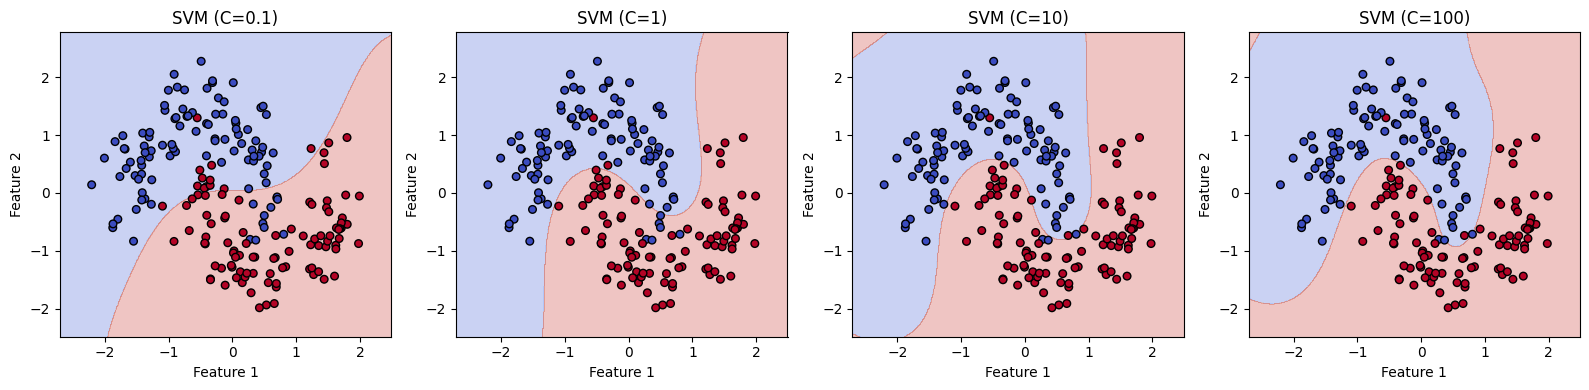

In [12]:
#Q27 Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually?
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Step 1: Generate synthetic data (non-linear)
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Step 2: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Different C values to test
C_values = [0.1, 1, 10, 100]

# Step 4: Create subplots
fig, axes = plt.subplots(1, len(C_values), figsize=(16, 4))

for ax, C in zip(axes, C_values):
    # Train SVM with RBF kernel for non-linear separation
    model = SVC(kernel='rbf', C=C, gamma='scale')
    model.fit(X_scaled, y)

    # Create a mesh grid for plotting decision boundaries
    x_min, x_max = X_scaled[:, 0].min() - 0.5, X_scaled[:, 0].max() + 0.5
    y_min, y_max = X_scaled[:, 1].min() - 0.5, X_scaled[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    # Predict over the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and data points
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, s=30, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_title(f"SVM (C={C})")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

plt.tight_layout()
plt.show()


In [13]:
#Q28 Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features?
import numpy as np
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a synthetic dataset with binary features
# 0 or 1 values for each feature
np.random.seed(42)
X = np.random.randint(2, size=(100, 5))  # 100 samples, 5 binary features
y = np.random.randint(2, size=100)       # Binary labels (0 or 1)

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Train Bernoulli Naïve Bayes classifier
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = bnb.predict(X_test)

# Step 5: Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Step 6: Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"]))


Accuracy: 0.3500

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.17      0.11      0.13         9
     Class 1       0.43      0.55      0.48        11

    accuracy                           0.35        20
   macro avg       0.30      0.33      0.31        20
weighted avg       0.31      0.35      0.32        20



In [14]:
#Q29 Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data?
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Step 1: Load dataset (Iris for example)
data = load_iris()
X = data.data
y = data.target

# Step 2: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------- Without Feature Scaling ----------
svm_no_scale = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_no_scale.fit(X_train, y_train)
y_pred_no_scale = svm_no_scale.predict(X_test)
acc_no_scale = accuracy_score(y_test, y_pred_no_scale)

# ---------- With Feature Scaling ----------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_scaled = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svm_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

# Step 3: Print comparison
print("SVM Performance Comparison:")
print(f"Without Scaling: Accuracy = {acc_no_scale:.4f}")
print(f"With Scaling   : Accuracy = {acc_scaled:.4f}")


SVM Performance Comparison:
Without Scaling: Accuracy = 1.0000
With Scaling   : Accuracy = 1.0000


In [15]:
#Q30 Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing?
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Step 1: Load dataset
data = load_iris()
X = data.data
y = data.target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Step 3: GaussianNB without smoothing (very small var_smoothing)
gnb_no_smoothing = GaussianNB(var_smoothing=1e-9)
gnb_no_smoothing.fit(X_train, y_train)
y_pred_no_smoothing = gnb_no_smoothing.predict(X_test)
acc_no_smoothing = accuracy_score(y_test, y_pred_no_smoothing)

# Step 4: GaussianNB with Laplace-like smoothing (higher var_smoothing)
gnb_with_smoothing = GaussianNB(var_smoothing=1e-2)
gnb_with_smoothing.fit(X_train, y_train)
y_pred_with_smoothing = gnb_with_smoothing.predict(X_test)
acc_with_smoothing = accuracy_score(y_test, y_pred_with_smoothing)

# Step 5: Print comparison
print("GaussianNB Accuracy Comparison:")
print(f"Without Smoothing : {acc_no_smoothing:.4f}")
print(f"With Smoothing    : {acc_with_smoothing:.4f}")

print("\nPredictions Without Smoothing:")
print(y_pred_no_smoothing)
print("\nPredictions With Smoothing:")
print(y_pred_with_smoothing)


GaussianNB Accuracy Comparison:
Without Smoothing : 0.9778
With Smoothing    : 1.0000

Predictions Without Smoothing:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]

Predictions With Smoothing:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [16]:
#Q31 Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C,gamma, kernel)?
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 1: Load dataset (Iris)
data = load_iris()
X, y = data.data, data.target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Define SVM model
svm_model = SVC()

# Step 4: Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale'],
    'kernel': ['linear', 'rbf', 'poly']
}

# Step 5: Set up GridSearchCV
grid_search = GridSearchCV(
    svm_model,
    param_grid,
    cv=5,               # 5-fold cross-validation
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Step 6: Run Grid Search
grid_search.fit(X_train, y_train)

# Step 7: Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# Step 8: Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Best Cross-Validation Accuracy: 0.9583
Test Accuracy: 1.0000


In [17]:
#Q32 Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy?
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                           n_redundant=2, n_classes=2,
                           weights=[0.9, 0.1],  # 90% class 0, 10% class 1
                           random_state=42)

# Step 2: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------- Model without class weighting ----------
svm_no_weight = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_no_weight.fit(X_train, y_train)
y_pred_no_weight = svm_no_weight.predict(X_test)
acc_no_weight = accuracy_score(y_test, y_pred_no_weight)

# ---------- Model with class weighting ----------
svm_weighted = SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced')
svm_weighted.fit(X_train, y_train)
y_pred_weighted = svm_weighted.predict(X_test)
acc_weighted = accuracy_score(y_test, y_pred_weighted)

# Step 3: Compare results
print("SVM on Imbalanced Data:")
print(f"Without Class Weighting: Accuracy = {acc_no_weight:.4f}")
print(f"With Class Weighting   : Accuracy = {acc_weighted:.4f}")

print("\nClassification Report Without Weighting:")
print(classification_report(y_test, y_pred_no_weight))

print("\nClassification Report With Weighting:")
print(classification_report(y_test, y_pred_weighted))


SVM on Imbalanced Data:
Without Class Weighting: Accuracy = 0.9450
With Class Weighting   : Accuracy = 0.9350

Classification Report Without Weighting:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       179
           1       1.00      0.48      0.65        21

    accuracy                           0.94       200
   macro avg       0.97      0.74      0.81       200
weighted avg       0.95      0.94      0.94       200


Classification Report With Weighting:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       179
           1       0.64      0.86      0.73        21

    accuracy                           0.94       200
   macro avg       0.81      0.90      0.85       200
weighted avg       0.95      0.94      0.94       200



In [18]:
#Q33 Write a Python program to implement a Naïve Bayes classifier for spam detection using email data?
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Sample dataset (in practice, load a real dataset)
emails = [
    "Win a brand new car just by entering the competition!",   # spam
    "Congratulations, you have won a lottery of $1,000,000!", # spam
    "Meeting scheduled at 10 AM tomorrow in the conference room.", # ham
    "Please find the project report attached.",               # ham
    "Lowest price for medicines, buy now!",                   # spam
    "Let's have lunch tomorrow at our favorite place.",       # ham
    "Get cheap loans instantly without any documents.",       # spam
    "Can we reschedule our call to next week?"                # ham
]

labels = [1, 1, 0, 0, 1, 0, 1, 0]  # 1 = spam, 0 = ham

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    emails, labels, test_size=0.25, random_state=42
)

# Step 3: Convert text into numerical features
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 4: Train Naïve Bayes model
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

# Step 5: Predictions
y_pred = nb.predict(X_test_vec)

# Step 6: Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Ham", "Spam"]))

# Step 7: Test with new emails
new_emails = [
    "Get a free vacation to Paris now!",
    "Let's meet for coffee this weekend."
]
new_emails_vec = vectorizer.transform(new_emails)
predictions = nb.predict(new_emails_vec)
print("\nNew Email Predictions:")
for email, label in zip(new_emails, predictions):
    print(f"{email} -> {'Spam' if label == 1 else 'Ham'}")


Accuracy: 0.5000

Classification Report:
              precision    recall  f1-score   support

         Ham       0.50      1.00      0.67         1
        Spam       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


New Email Predictions:
Get a free vacation to Paris now! -> Spam
Let's meet for coffee this weekend. -> Spam


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
#Q34 Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy?
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Step 1: Load dataset (Iris)
data = load_iris()
X, y = data.data, data.target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------- Train SVM ----------
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)

# ---------- Train Naïve Bayes ----------
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)

# Step 3: Print results
print("Accuracy Comparison:")
print(f"SVM Accuracy       : {acc_svm:.4f}")
print(f"Naïve Bayes Accuracy: {acc_nb:.4f}")


Accuracy Comparison:
SVM Accuracy       : 1.0000
Naïve Bayes Accuracy: 1.0000


In [20]:
#Q35 Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results?
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score

# Step 1: Load dataset (Iris)
data = load_iris()
X, y = data.data, data.target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------- Without Feature Selection ----------
nb_full = GaussianNB()
nb_full.fit(X_train, y_train)
y_pred_full = nb_full.predict(X_test)
acc_full = accuracy_score(y_test, y_pred_full)

# ---------- With Feature Selection ----------
# Select top 2 features using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=2)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

nb_selected = GaussianNB()
nb_selected.fit(X_train_selected, y_train)
y_pred_selected = nb_selected.predict(X_test_selected)
acc_selected = accuracy_score(y_test, y_pred_selected)

# Step 3: Print results
print("Naïve Bayes Accuracy Comparison:")
print(f"Without Feature Selection: {acc_full:.4f}")
print(f"With Feature Selection   : {acc_selected:.4f}")


Naïve Bayes Accuracy Comparison:
Without Feature Selection: 1.0000
With Feature Selection   : 1.0000


In [21]:
#Q36 Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy?
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 1: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Train SVM with different kernels
kernels = ['linear', 'poly', 'rbf']
accuracies = {}

for kernel in kernels:
    model = SVC(kernel=kernel, C=1.0, gamma='scale')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[kernel] = acc

# Step 4: Print comparison
print("SVM Kernel Accuracy Comparison:")
for kernel, acc in accuracies.items():
    print(f"{kernel.capitalize()} Kernel: {acc:.4f}")


SVM Kernel Accuracy Comparison:
Linear Kernel: 0.9561
Poly Kernel: 0.9474
Rbf Kernel: 0.9474


SVM Kernel Accuracy Comparison:
Linear Kernel: 0.9561
Poly Kernel: 0.9474
Rbf Kernel: 0.9474


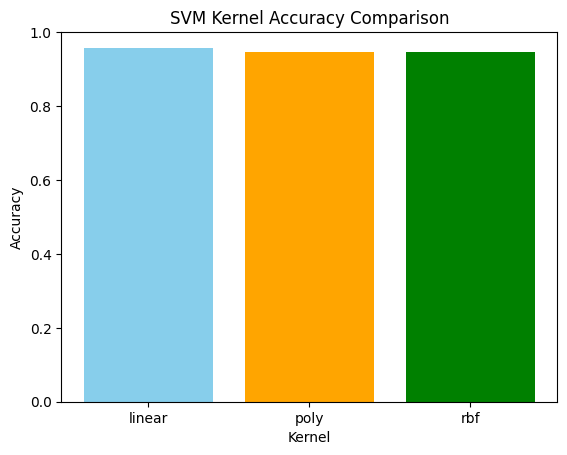

In [22]:
#Q37 Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy?
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Split dataset into train & test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Define kernels
kernels = ['linear', 'poly', 'rbf']
accuracies = {}

# Step 4: Train & evaluate SVM models for each kernel
for kernel in kernels:
    model = SVC(kernel=kernel, C=1.0, gamma='scale')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[kernel] = accuracy_score(y_test, y_pred)

# Step 5: Print accuracy results
print("SVM Kernel Accuracy Comparison:")
for k, acc in accuracies.items():
    print(f"{k.capitalize()} Kernel: {acc:.4f}")

# Step 6: Visualize results
plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue', 'orange', 'green'])
plt.title("SVM Kernel Accuracy Comparison")
plt.xlabel("Kernel")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


In [23]:
#Q38 Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy?
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Step 1: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 3: Initialize model
model = SVC(kernel='linear', C=1.0, gamma='scale')

# Step 4: Store accuracies
accuracies = []

# Step 5: Perform Stratified K-Fold Cross-Validation
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Fold {fold} Accuracy: {acc:.4f}")

# Step 6: Compute average accuracy
avg_accuracy = np.mean(accuracies)
print(f"\nAverage Accuracy: {avg_accuracy:.4f}")


Fold 1 Accuracy: 0.9474
Fold 2 Accuracy: 0.9298
Fold 3 Accuracy: 0.9561
Fold 4 Accuracy: 0.9386
Fold 5 Accuracy: 0.9646

Average Accuracy: 0.9473


In [24]:
#Q39 Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance?
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Step 1: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 3: Define different prior probabilities
# Class 0 = malignant, Class 1 = benign (order matches y's classes)
priors_list = [
    None,                  # Let the model learn priors from data
    [0.5, 0.5],            # Equal priors
    [0.3, 0.7],            # Skewed towards class 1
    [0.7, 0.3]             # Skewed towards class 0
]

# Step 4: Train and evaluate models with different priors
for priors in priors_list:
    model = GaussianNB(priors=priors)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"Priors={priors} -> Accuracy: {acc:.4f}")


Priors=None -> Accuracy: 0.9474
Priors=[0.5, 0.5] -> Accuracy: 0.9357
Priors=[0.3, 0.7] -> Accuracy: 0.9474
Priors=[0.7, 0.3] -> Accuracy: 0.9357


In [25]:
#Q40Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy?
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Step 1: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 3: Train baseline SVM (without feature selection)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_baseline = svm_model.predict(X_test)
baseline_acc = accuracy_score(y_test, y_pred_baseline)

# Step 4: Apply RFE for feature selection
rfe_selector = RFE(estimator=SVC(kernel='linear'), n_features_to_select=10)
rfe_selector.fit(X_train, y_train)

# Step 5: Train SVM on selected features
X_train_rfe = rfe_selector.transform(X_train)
X_test_rfe = rfe_selector.transform(X_test)

svm_rfe = SVC(kernel='linear', random_state=42)
svm_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = svm_rfe.predict(X_test_rfe)
rfe_acc = accuracy_score(y_test, y_pred_rfe)

# Step 6: Compare results
print(f"Baseline Accuracy (All features): {baseline_acc:.4f}")
print(f"Accuracy after RFE (10 features): {rfe_acc:.4f}")
print(f"Selected features indices: {list(rfe_selector.get_support(indices=True))}")

Baseline Accuracy (All features): 0.9532
Accuracy after RFE (10 features): 0.9591
Selected features indices: [np.int64(0), np.int64(6), np.int64(10), np.int64(11), np.int64(20), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28)]


In [26]:
#Q41 Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, andF1-Score instead of accuracy?
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Step 1: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 3: Train SVM Classifier
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Step 4: Predictions
y_pred = svm_model.predict(X_test)

# Step 5: Evaluate with Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print("\nDetailed Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=data.target_names))


Precision: 0.8889
Recall:    0.9720
F1-Score:  0.9286

Detailed Classification Report:

              precision    recall  f1-score   support

   malignant       0.94      0.80      0.86        64
      benign       0.89      0.97      0.93       107

    accuracy                           0.91       171
   macro avg       0.92      0.88      0.90       171
weighted avg       0.91      0.91      0.90       171



In [27]:
#Q42 Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss(Cross-Entropy Loss)?
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss

# Step 1: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 3: Train Naïve Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Step 4: Predict probabilities (needed for log loss)
y_proba = nb_model.predict_proba(X_test)

# Step 5: Calculate Log Loss
loss = log_loss(y_test, y_proba)

print(f"Log Loss (Cross-Entropy Loss): {loss:.4f}")


Log Loss (Cross-Entropy Loss): 0.3382


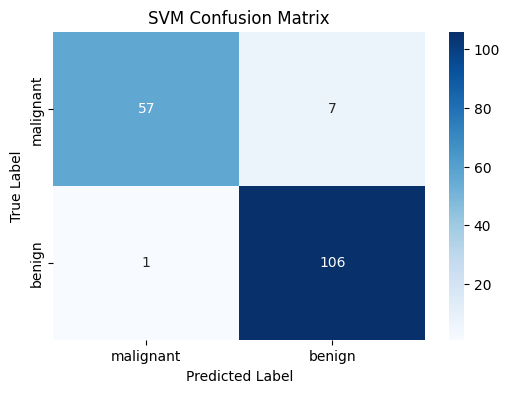

In [28]:
#Q43 Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn?
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Step 1: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 3: Train SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Step 4: Predict on test set
y_pred = svm_model.predict(X_test)

# Step 5: Create Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Step 6: Visualize using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("SVM Confusion Matrix")
plt.show()


In [29]:
#Q44 Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE?
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Step 1: Load dataset
data = load_diabetes()
X, y = data.data, data.target

# Step 2: Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Create and train the SVR model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = svr_model.predict(X_test)

# Step 5: Evaluate using Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Step 6: Display result
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 52.21405397175593


ROC-AUC Score: 0.9983622666229938


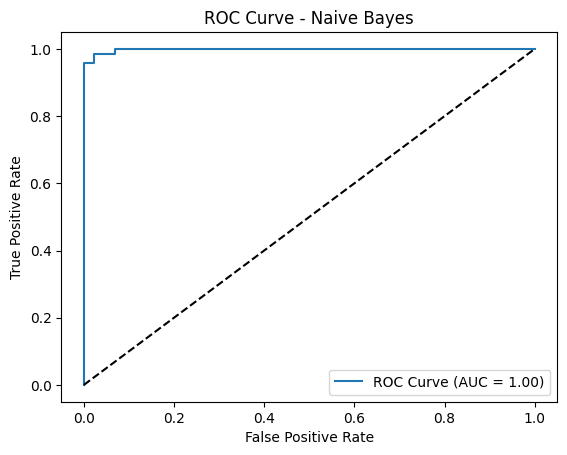

In [30]:
#Q45 Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score?
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 1: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Train Gaussian Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Step 4: Get predicted probabilities for the positive class
y_proba = model.predict_proba(X_test)[:, 1]

# Step 5: Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

# Step 6: Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naive Bayes")
plt.legend()
plt.show()


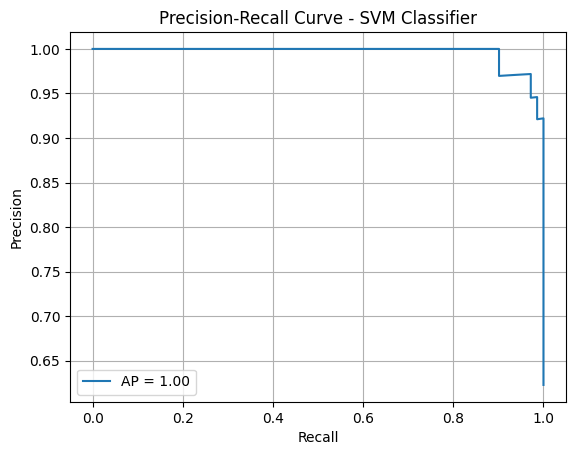

Average Precision Score: 0.9960990902415073


In [31]:
#Q46 Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.?
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Step 1: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Train SVM classifier with probability estimates enabled
model = SVC(kernel='rbf', probability=True, random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict probabilities for the positive class
y_scores = model.predict_proba(X_test)[:, 1]

# Step 5: Compute Precision-Recall data
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

# Step 6: Plot Precision-Recall curve
plt.plot(recall, precision, label=f'AP = {avg_precision:.2f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - SVM Classifier")
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Print Average Precision Score
print("Average Precision Score:", avg_precision)
